<a href="https://colab.research.google.com/github/dpwalford/STA4032/blob/main/Math_24_Lab_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

### Imports

In [1]:
# importing all necesary libraries
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [2]:
# installing wandb
!pip install wandb
import wandb as wb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 195.4/195.4 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 263.5/263.5 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00


In [3]:
#creating functions
def plot(x):
    if type(x) == torch.Tensor :
        x = x.cpu().detach().numpy()

    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()

In [4]:
def montage_plot(x):
    x = np.pad(x, pad_width=((0, 0), (1, 1), (1, 1)), mode='constant', constant_values=0)
    plot(montage(x))

In [5]:
b = 1000

def get_batch(mode):
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y


## MNIST
    

### Load Data

In [6]:
# #MNIST
train_set = MNIST('./data', train=True, download=True)
test_set  = MNIST('./data', train=False, download=True)

#KMNIST
# train_set = KMNIST('./data', train=True, download=True)
# test_set =  KMNIST('./data', train=False, download=True)

# Fashion MNIST
# train_set = FashionMNIST('./data', train=True, download=True)
# test_set =  FashionMNIST('./data', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 116052877.46it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 37215266.92it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 54403148.11it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 10021319.71it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



In [7]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()

X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255

In [8]:
X.shape

(60000, 1, 28, 28)

In [9]:
Y[50000]

3

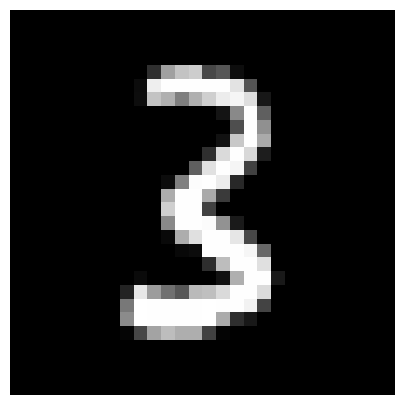

In [10]:
plot(X[50000,0,:,:])

In [11]:
Y[100]

5

In [12]:
X.shape

(60000, 1, 28, 28)

In [13]:
X[0:25,0,:,:].shape

(25, 28, 28)

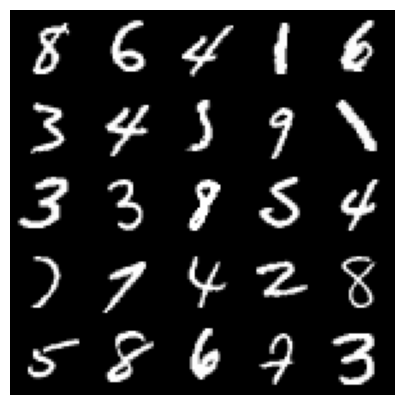

In [14]:
montage_plot(X[125:150,0,:,:])

In [15]:
X.shape[0]

60000

In [16]:
X_test.shape

(10000, 1, 28, 28)

In [17]:
X.shape[0]

60000

In [18]:
X_test.shape[0]

10000

In [19]:
def GPU(data):
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

In [20]:
X = GPU_data(X)
Y = GPU_data(Y)
X_test = GPU_data(X_test)
Y_test = GPU_data(Y_test)

In [21]:
X = X.reshape(X.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [22]:
X.shape

torch.Size([60000, 784])


### Classifier


In [23]:
x,y = get_batch('train')

In [24]:
x.shape

torch.Size([1000, 784])

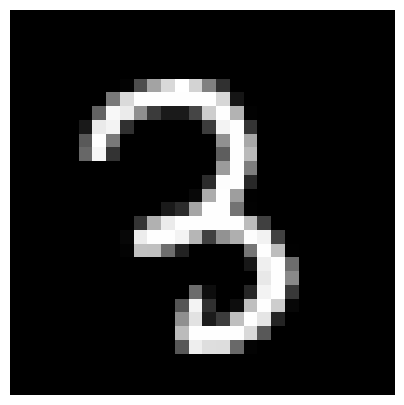

In [25]:
plot(x[0].reshape(28,28))

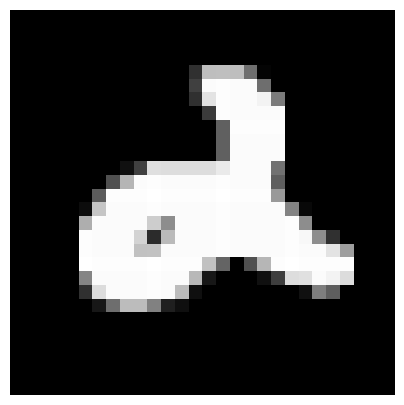

In [26]:
plot(x[1].reshape(28,28))

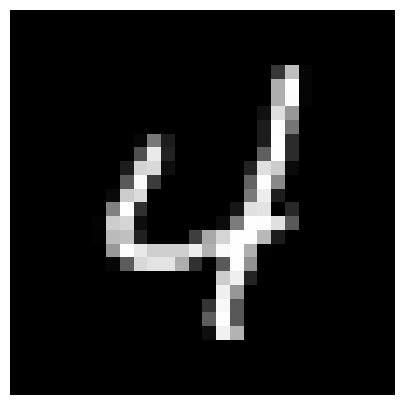

In [27]:
plot(x[2].reshape(28,28))

In [28]:
y[:10]

tensor([3., 2., 4., 4., 4., 6., 2., 7., 1., 7.], device='cuda:0')

In [29]:
W = GPU(np.random.randn(784,10))

In [30]:
x.shape, W.shape

(torch.Size([1000, 784]), torch.Size([784, 10]))

In [31]:
torch.matmul(x,W).shape

torch.Size([1000, 10])

In [32]:
(x@W).shape

torch.Size([1000, 10])

In [33]:
%%timeit
x@W

22.5 µs ± 1.85 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [34]:
x@W

tensor([[ -0.2114,   7.4682,  -4.1327,  ..., -13.9445,  -0.8148, -11.7069],
        [ 14.7487,   1.7124,  12.0816,  ...,   5.4831, -19.1891, -36.5311],
        [ -3.6653,   5.8235,  -2.5325,  ...,  -4.2827,  -3.2135, -13.4154],
        ...,
        [  2.6063,  17.7674,  -6.5330,  ..., -11.9514,  -5.8764, -17.0823],
        [ 13.2154,   6.4836,  14.1533,  ...,  -1.1548,  -9.3416,  -8.1390],
        [ 13.4345,  12.0613,  15.1873,  ..., -11.8846, -10.5847, -18.6941]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [35]:
y2 = x@W

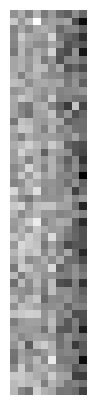

In [36]:
plot(y2[:50])

In [37]:
y

tensor([3., 2., 4., 4., 4., 6., 2., 7., 1., 7., 1., 5., 6., 4., 6., 5., 7., 0.,
        3., 9., 8., 9., 8., 8., 0., 0., 1., 2., 9., 0., 3., 3., 0., 5., 1., 6.,
        0., 1., 2., 8., 9., 6., 9., 4., 6., 6., 4., 0., 8., 9., 2., 2., 8., 6.,
        7., 4., 7., 3., 9., 9., 5., 3., 7., 0., 8., 0., 0., 5., 9., 2., 0., 5.,
        5., 8., 7., 8., 0., 8., 9., 9., 1., 4., 8., 3., 2., 8., 0., 8., 2., 5.,
        4., 5., 5., 7., 0., 1., 1., 3., 9., 6., 8., 9., 3., 4., 1., 1., 6., 7.,
        1., 6., 0., 9., 1., 3., 2., 3., 4., 7., 7., 4., 5., 1., 1., 9., 7., 1.,
        9., 0., 0., 6., 7., 0., 8., 1., 1., 2., 2., 3., 6., 4., 7., 5., 3., 6.,
        8., 7., 0., 8., 4., 9., 7., 0., 5., 1., 4., 2., 1., 3., 5., 4., 6., 5.,
        2., 6., 0., 7., 6., 8., 0., 9., 2., 0., 9., 1., 8., 2., 2., 3., 9., 4.,
        6., 5., 4., 6., 5., 7., 7., 8., 5., 9., 3., 0., 6., 8., 6., 3., 0., 9.,
        8., 5., 9., 5., 8., 2., 6., 6., 1., 8., 0., 4., 9., 9., 9., 1., 0., 7.,
        3., 1., 3., 2., 0., 3., 7., 5., 

In [38]:
y.shape

torch.Size([1000])

In [39]:
def one_hot(y):
    y2 = GPU_data(torch.zeros((y.shape[0],10)))
    for i in range(y.shape[0]):
        y2[i,int(y[i])] = 1
    return y2

In [40]:
one_hot(y)

<ipython-input-19-c3d856de2607>:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 1.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 1., 0.],
        [0., 0., 1.,  ..., 0., 0., 0.]], device='cuda:0')

In [41]:
torch.argmax(y2,1)

tensor([3, 3, 4, 5, 1, 5, 3, 3, 3, 0, 2, 5, 8, 5, 1, 1, 2, 2, 1, 5, 2, 3, 2, 3,
        0, 1, 3, 3, 3, 5, 1, 1, 1, 5, 0, 1, 5, 3, 1, 2, 5, 5, 0, 4, 5, 5, 1, 5,
        1, 3, 3, 2, 3, 5, 0, 4, 3, 2, 1, 4, 5, 2, 3, 1, 2, 5, 5, 1, 1, 3, 1, 0,
        1, 3, 0, 1, 1, 3, 2, 0, 3, 3, 5, 3, 3, 3, 5, 3, 3, 1, 1, 5, 4, 0, 1, 3,
        2, 3, 8, 5, 2, 4, 7, 1, 2, 3, 5, 0, 3, 5, 1, 3, 3, 1, 3, 2, 4, 4, 9, 3,
        2, 0, 2, 4, 2, 3, 1, 5, 5, 3, 3, 0, 2, 3, 3, 3, 3, 3, 1, 3, 3, 5, 1, 5,
        3, 1, 2, 3, 5, 1, 1, 2, 8, 0, 1, 3, 0, 5, 2, 4, 5, 5, 3, 5, 1, 0, 1, 3,
        2, 1, 3, 5, 5, 3, 5, 3, 1, 1, 8, 1, 0, 5, 3, 5, 4, 1, 1, 1, 2, 3, 0, 1,
        5, 5, 4, 3, 5, 2, 0, 5, 5, 5, 3, 3, 5, 5, 3, 5, 1, 4, 1, 1, 1, 3, 3, 0,
        2, 3, 5, 0, 5, 3, 0, 1, 2, 1, 2, 5, 2, 3, 5, 2, 1, 0, 9, 3, 1, 1, 2, 3,
        1, 5, 5, 3, 5, 5, 3, 0, 4, 3, 3, 1, 5, 2, 2, 4, 2, 0, 2, 5, 5, 3, 0, 3,
        1, 3, 3, 1, 2, 5, 1, 1, 3, 1, 2, 2, 5, 4, 1, 5, 5, 5, 1, 0, 3, 2, 0, 5,
        5, 1, 0, 1, 3, 5, 2, 3, 1, 3, 3,

In [42]:
torch.sum(y == torch.argmax(y2,1))/b

tensor(0.0890, device='cuda:0')

In [43]:
X.shape

torch.Size([60000, 784])

In [44]:
X@W

tensor([[  1.0993,   2.8453,   1.6124,  ..., -10.5973,  -9.8648,  -5.0102],
        [ 12.4941,   1.7070,   4.4320,  ...,   0.1195,  -4.6257, -15.6378],
        [-13.2633,  10.7585,  -1.0766,  ...,   2.1898,  -4.3123,  -4.0760],
        ...,
        [ -0.9372,  -0.8329, -11.0989,  ...,  -5.4195,  -4.7533,  -2.7913],
        [ -2.2890,   3.4468,  12.6920,  ...,  -0.2063,   3.8181, -23.9372],
        [  5.8694,   0.2025,  -2.9228,  ...,   1.8986,  -8.4258,  -4.9199]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [45]:
torch.argmax(X@W,1)

tensor([5, 3, 1,  ..., 5, 2, 3], device='cuda:0')

In [46]:
Y

tensor([5., 0., 4.,  ..., 5., 6., 8.], device='cuda:0')

In [47]:
torch.sum(torch.argmax(X@W,1) == Y)/60000

tensor(0.0842, device='cuda:0')

In [48]:
X@W

tensor([[  1.0993,   2.8453,   1.6124,  ..., -10.5973,  -9.8648,  -5.0102],
        [ 12.4941,   1.7070,   4.4320,  ...,   0.1195,  -4.6257, -15.6378],
        [-13.2633,  10.7585,  -1.0766,  ...,   2.1898,  -4.3123,  -4.0760],
        ...,
        [ -0.9372,  -0.8329, -11.0989,  ...,  -5.4195,  -4.7533,  -2.7913],
        [ -2.2890,   3.4468,  12.6920,  ...,  -0.2063,   3.8181, -23.9372],
        [  5.8694,   0.2025,  -2.9228,  ...,   1.8986,  -8.4258,  -4.9199]],
       device='cuda:0', grad_fn=<MmBackward0>)

In [49]:
W.shape

torch.Size([784, 10])

In [50]:
W[:,0].shape

torch.Size([784])

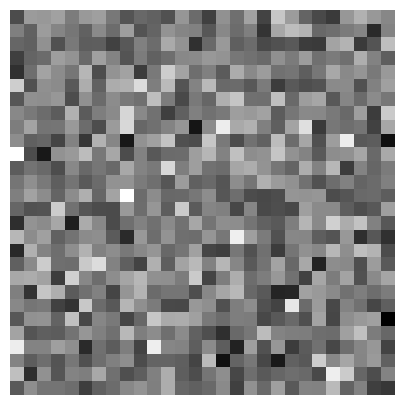

In [51]:
plot(W[:,0].reshape(28,28))

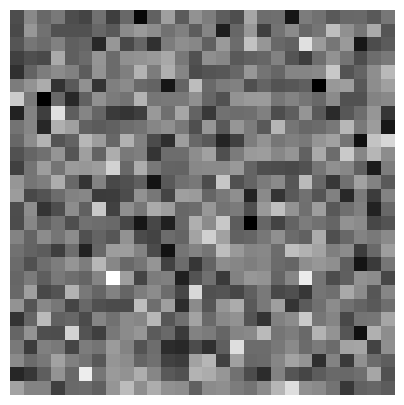

In [52]:
plot(W[:,2].reshape(28,28))

In [53]:
W.shape

torch.Size([784, 10])

In [54]:
(W.T).shape

torch.Size([10, 784])

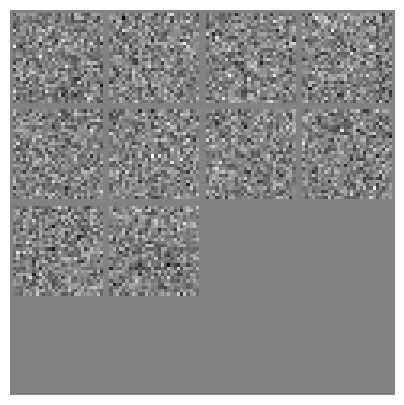

In [55]:
montage_plot((W.T).reshape(10,28,28).cpu().detach().numpy())

In [56]:
def softmax(x):
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [57]:
def cross_entropy(outputs, labels):
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]

In [58]:
def acc(out,y):
    return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [59]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [60]:
def model(x,w):

    return x@w[0]

In [61]:
def gradient_step(w):

    w[0].data = w[0].data - c.L*w[0].grad.data

    w[0].grad.data.zero_()

In [62]:
def make_plots():

    acc_train = acc(model(x,w),y)

    xt,yt = get_batch('test')

    acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train, "acc_test": acc_test})

In [63]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [64]:
for run in range(3):

    wb.init(project="Simple_Linear_SGD_123");
    c = wb.config

    c.L = 0.1
    c.b = 1024
    c.epochs = 10000

    w = [GPU(Truncated_Normal((784,10)))]

    for i in range(c.epochs):

        x,y = get_batch('train')

        out = model(x,w)

        loss = cross_entropy(softmax(out),y)

        loss.backward()

        gradient_step(w)

        make_plots()

        if (i+1) % 10000 == 0: montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 1172, in init
    wi.setup(kwargs)
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_init.py", line 306, in setup
    wandb_login._login(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 317, in _login
    wlogin.prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 240, in prompt_api_key
    key, status = self._prompt_api_key()
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/wandb_login.py", line 220, in _prompt_api_key
    key = apikey.prompt_api_key(
  File "/usr/local/lib/python3.10/dist-packages/wandb/sdk/lib/

Error: An unexpected error occurred

In [ ]:
for run in range(100):

    wb.init(project="Simple_Linear_Adam_2");
    c = wb.config

    c.L = 0.01
    c.b = 1024
    c.epochs = 100000

    w = [GPU(Truncated_Normal((784,10)))]

    optimizer = torch.optim.Adam(w, lr=c.L)

    for i in range(c.epochs):

        x,y = get_batch('train')

        loss = cross_entropy(softmax(model(x,w)),y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        wb.log({"loss": loss})

        make_plots()

        if i % 10000 == 0 : montage_plot((w[0].T).reshape(10,28,28).cpu().detach().numpy())


### Autoencoder


In [ ]:
def get_batch(mode):
    b = 1024
    if mode == "train":
        r = np.random.randint(X.shape[0]-b)
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [ ]:
X = X.reshape(X.shape[0],1,28,28)
X_test = X_test.reshape(X_test.shape[0],1,28,28)

In [ ]:
import torchvision
from torch.nn.functional import *

In [ ]:
X = torchvision.transforms.functional.normalize(X,0.5,0.5)
X_test = torchvision.transforms.functional.normalize(X_test,0.5,0.5)

In [ ]:
def Encoder(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    return x

In [ ]:
def Decoder(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
def Autoencoder(x,w):
    return Decoder(Encoder(x,w),w)

In [ ]:
num_steps = 1000
batch_size = 512
learning_rate = 1e-3

In [ ]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from PIL import Image
from imageio import *
import torch
from skimage.transform import resize
from mpl_toolkits.axes_grid1.axes_rgb import make_rgb_axes, RGBAxes
from torchvision.models import *
from torchvision.datasets import MNIST,KMNIST,FashionMNIST
from skimage.util import montage

In [ ]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [ ]:
#Encode
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((10,6272)))
#Decode
w3 = GPU(randn_trunc((6272,10)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

optimizer = torch.optim.Adam(params=w, lr=learning_rate)

for i in range(num_steps):

    x_real,y = get_batch('train')

    x_fake = Autoencoder(x_real,w)

    loss = torch.mean((x_fake - x_real)**2)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if i % 100 == 0: print(loss.item())

In [ ]:
image_batch,y = get_batch('test')

In [ ]:
image_batch_recon = Autoencoder(image_batch,w)

In [ ]:
torch.mean((image_batch_recon - image_batch)**2)

In [ ]:
montage_plot(image_batch[0:25,0,:,:].cpu().detach().numpy())

In [ ]:
montage_plot(image_batch_recon[0:25,0,:,:].cpu().detach().numpy())


### Generator



In [ ]:
latent_size = 64
hidden_size = 256
image_size = 784
b = 1024

In [ ]:
#MNIST
# train_set = MNIST('./data', train=True, download=True)
# test_set = MNIST('./data', train=False, download=True)

#KMNIST
#train_set = KMNIST('./data', train=True, download=True)
#test_set = KMNIST('./data', train=False, download=True)

#Fashion MNIST
train_set = FashionMNIST('./data', train=True, download=True)
test_set = FashionMNIST('./data', train=False, download=True)

In [ ]:
X = train_set.data.numpy()
X_test = test_set.data.numpy()
Y = train_set.targets.numpy()
Y_test = test_set.targets.numpy()
X = X[:,None,:,:]/255
X_test = X_test[:,None,:,:]/255
X = (X - 0.5)/0.5
X_test = (X_test - 0.5)/0.5

In [ ]:
n = 7

index = np.where(Y == n)
X = X[index]
index = np.where(Y_test == n)
X_test = X_test[index]

In [ ]:
X.shape,Y.shape,X_test.shape,Y_test.shape

In [ ]:
###################################################

In [ ]:
X = GPU_data(X)
X_test = GPU_data(X_test)
Y = GPU_data(Y)
Y_test = GPU_data(Y_test)

In [ ]:
x,y = get_batch('train')

In [ ]:
x.shape

In [ ]:
montage_plot(x[0:25,0,:,:].detach().cpu().numpy())

In [ ]:
#D
w0 = GPU(randn_trunc((64,1,4,4)))
w1 = GPU(randn_trunc((128,64,4,4)))
w2 = GPU(randn_trunc((1,6272)))
#G
w3 = GPU(randn_trunc((6272,64)))
w4 = GPU(randn_trunc((128,64,4,4)))
w5 = GPU(randn_trunc((64,1,4,4)))

w = [w0,w1,w2,w3,w4,w5]

In [ ]:
def D(x,w):
    x = relu(conv2d(x,w[0], stride=(2, 2), padding=(1, 1)))
    x = relu(conv2d(x,w[1], stride=(2, 2), padding=(1, 1)))
    x = x.view(x.size(0), 6272)
    x = linear(x,w[2])
    x = torch.sigmoid(x)
    return x

In [ ]:
def G(x,w):
    x = linear(x,w[3])
    x = x.view(x.size(0), 128, 7, 7)
    x = relu(conv_transpose2d(x,w[4], stride=(2, 2), padding=(1, 1)))
    x = torch.tanh(conv_transpose2d(x,w[5], stride=(2, 2), padding=(1, 1)))
    return x

In [ ]:
b = 1024

In [ ]:
batch_size = b

In [ ]:
batch_size

In [ ]:
d_optimizer = torch.optim.Adam(w[0:3], lr=0.0002)
g_optimizer = torch.optim.Adam(w[3:], lr=0.0002)

real_labels = (torch.ones(batch_size, 1).cuda())
fake_labels = (torch.zeros(batch_size, 1).cuda())

In [ ]:
num_epochs = 500
batches = X.shape[0]//batch_size
steps = num_epochs*batches

In [ ]:
z1 = (torch.randn(steps,batch_size,latent_size).cuda())
z2 = (torch.randn(steps,batch_size,latent_size).cuda())

In [ ]:
for i in range(steps):

    images,y = get_batch('train')

    d_loss = binary_cross_entropy(D(images,w), real_labels) + binary_cross_entropy(D(G(z1[i],w),w), fake_labels)
    d_optimizer.zero_grad()
    d_loss.backward()
    d_optimizer.step()


    g_loss = binary_cross_entropy(D(G(z2[i],w),w), real_labels)
    g_optimizer.zero_grad()
    g_loss.backward()
    g_optimizer.step()


    if i % 200 == 0:
        out = G(z1[np.random.randint(steps)],w)
        montage_plot(out.view(batch_size,1,28,28).detach().cpu().numpy()[0:25,0,:,:])

In [ ]:
z1[np.random.randint(steps)].shape

In [ ]:
noise = GPU_data(torch.randn(1,64))

In [ ]:
output = G(noise,w)

In [ ]:
output.shape

In [ ]:
plot(output[0,0])